# Perceptron (Artificial Neuron)

 - A Perceptron is a Single Layer Neural Network
 - It Acts as a Linear Classifier, Binary Classification
 - Loss Function : Binary Cross Entropy (-ve of Log Likelihood)
 - Optimisation : Gradient Descent / Stochastic Gradient Descent

## Learning Goals

 - How to Implement Perceptron ?
 - Understanding Vectorization, writing efficient code without using 'for' loop !
 - What is the Meaning of "Linear Classifier". 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Generating Data

In [2]:
X, Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=1)
print(X.shape, Y.shape)

(500, 2) (500,)


### Visualising The Data

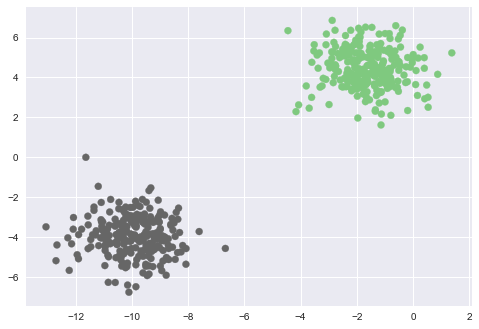

In [3]:
plt.style.use('seaborn')
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Accent)
plt.show()

### Define Model And Helper Functions

In [4]:
def sigmoid(z):
    return (1.0)/(1 + np.exp(-z))

# Broadcasting (Numpy Arrays)
# z = np.array([1,2,3,4,5])
# print(sigmoid(z))

#### Implement Perceptron learning Algorithm

 - Learn The Weights
 - Reduce The Loss
 - Make The Predictions
 - Visualise Decision Surface
 - Linear vs Non-Linear Classification

In [5]:
def predict(X, weights):
    """ X -> (m x (n+1)) matrix, W -> ((n+1) x 1) vector => X.W """
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

In [6]:
def loss(X, Y, weights):
    """ Binary Cross Entropy """
    Y_ = predict(X, weights)
    cost = np.mean((-Y * np.log(Y_)) - ((1-Y) * np.log(1-Y_)))
    return cost

In [7]:
def update(X, Y, weights, learning_rate):
    """ Perform Weight Updates For 1 Epoch"""
    Y_ = predict(X, weights)
    
    # X -> (m x n) [m -> examples and n -> features] => X.T -> (n x m)
    # (Y_ - Y) -> (m x 1) => O/P => (n x 1)
    dw = np.dot(X.T, Y_ - Y)
    
    m = X.shape[0]
    
    weights = (weights - ((learning_rate * dw)/float(m)))
    
    return weights

In [8]:
def train(X, Y, learning_rate=0.5, maxEpochs=100):
    
    # Modify The Input To Handle The Bias Term
    # X -> (m x n) => X -> (m x (n+1))
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    
    # Init Weights as 0
    weights = np.zeros(X.shape[1]) # (n+1) entries
    
    losses = []
    
    # Iterate Over All Epochs and Make Updates
    for epoch in range(maxEpochs):
        
        weights = update(X, Y, weights, learning_rate)
        
        # After Every 10 Epoch, Append The Progress
        if(epoch%10==0):
            l = loss(X, Y, weights)
            losses.append(l)
            # print("Epoch : %d -> Loss : %.4f"%(epoch, l))
            
    return weights, losses 

In [9]:
def getPredictions(X_Test, weights, labels=True):
    
    if (X_Test.shape[1] != weights.shape[0]):
        # X.W => X -> (m x (n+1)) & W -> ((n+1) x 1)
        ones = np.ones((X_Test.shape[0], 1))
        X_Test = np.hstack((ones, X_Test))
    
    probs = predict(X_Test, weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1 # Vectorization
        return labels

### Train The Model

In [10]:
weights, losses = train(X, Y, learning_rate=0.8, maxEpochs=1000)

### Visualising Loss

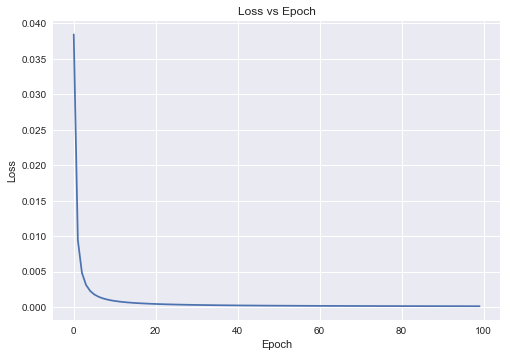

In [11]:
plt.plot(losses)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Visualising The Model Performance

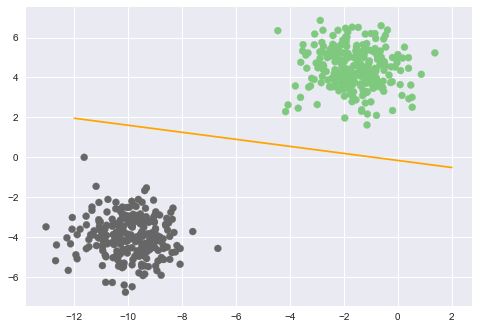

In [12]:
# [w0 + w1x1 + w2x2 = 0] => [x2 = -(w0 + w1x1)/w2]
x1 = np.linspace(-12, 2, 10)
x2 = -(weights[0] + (weights[1]*x1))/(weights[2])

plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Accent)
plt.plot(x1, x2, c='orange')
plt.show()

### Find The Accuracy

In [13]:
Y_ = getPredictions(X, weights, labels=True)
training_acc = np.sum(Y_==Y)/(Y.shape[0])
print("Training Accuracy : ", training_acc*100, "%")

Training Accuracy :  100.0 %


## Non-Linear Data

In [14]:
from sklearn.datasets import make_moons

In [15]:
Xm, Ym = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)
print(Xm.shape, Ym.shape)

(1000, 2) (1000,)


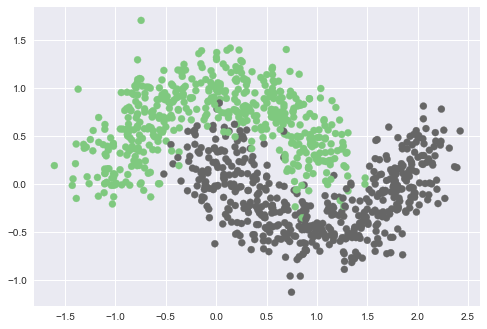

In [16]:
plt.style.use('seaborn')
plt.scatter(Xm[:,0], Xm[:,1], c=Ym, cmap=plt.cm.Accent)
plt.show()

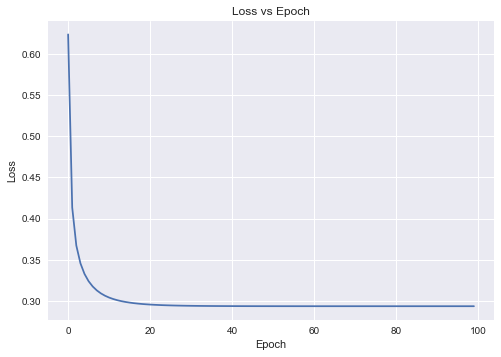

In [17]:
weights, losses = train(Xm, Ym, learning_rate=0.8, maxEpochs=1000)

plt.plot(losses)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

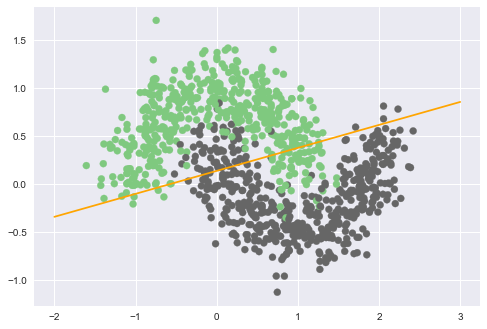

In [18]:
x1 = np.linspace(-2, 3, 10)
x2 = -(weights[0] + (weights[1]*x1))/(weights[2])

plt.scatter(Xm[:,0], Xm[:,1], c=Ym, cmap=plt.cm.Accent)
plt.plot(x1, x2, c='orange')
plt.show()

In [19]:
Y_ = getPredictions(Xm, weights, labels=True)
training_acc = np.sum(Y_==Ym)/(Ym.shape[0])
print("Training Accuracy : ", training_acc*100, "%")

Training Accuracy :  86.9 %


## Conclusion

 - Perceptron Works Well For Linearly Separable Data
 - But Perceptron Fails For Non-Linearly Separable Data
 - For Non-Linearly Separable Data, We Need To Explore Multilayered Perceptron (MLP)